Project Description:
This project focuses on performing an exploratory data analysis (EDA) of Airbnb listings within a selected city. The goal is to examine various factors such as price, availability, location, and property type to uncover the underlying trends and patterns that influence the demand for Airbnb listings. Through this analysis, we aim to provide a comprehensive overview of the Airbnb market in the city, helping stakeholders to make informed decisions.

Objectives:
- Analyze key factors that influence the demand for Airbnb listings in the city, including but not limited to price, availability, location, and property type.
- Perform thorough data cleaning to prepare the dataset for in-depth analysis, ensuring the removal of outliers and handling of missing values.
- Utilize advanced data visualization techniques to illustrate trends and patterns in the data, making it easier to identify key insights.
- Conduct statistical analysis to substantiate the findings and insights derived from the data.
- Employ Python and Jupyter Notebook as the primary tools for conducting the analysis and visualization, leveraging libraries such as Pandas, NumPy, Matplotlib, and Seaborn.

Criteria:
- The data must be efficiently cleaned to remove inaccuracies and prepare it for analysis. This includes handling missing values, removing outliers, and ensuring the data is consistent.
- The analysis should thoroughly examine the impact of various factors like price, availability, location, and property type on the demand for Airbnb listings. If the review file is chosen, the analysis should adapt to focus on relevant fields.
- Data visualizations should be developed to clearly depict the trends and patterns identified in the analysis. These visualizations should be insightful, making it easy to grasp the dynamics of the Airbnb market in the city.
- Statistical analysis is required to validate the trends and patterns observed, providing a solid foundation for the conclusions drawn from the data.
- The findings should be clearly explained, and a business plan should be suggested based on the insights gained from the analysis.
- Any CSV file from http://insideairbnb.com/get-the-data/ can be chosen for this analysis. It is essential that the chosen dataset is up-to-date and relevant to ensure the analysis reflects the current state of the Airbnb market in the selected city.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go 
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True) 

### Load Data 

In [2]:
df = pd.read_csv("listings.csv")

### View nan vaues 

In [3]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
price                             0.133663
last_review                       0.103960
reviews_per_month                 0.103960
host_name                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
name                              0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
id                                0.000000
dtype: float64

### Drop Nan values 
* Drop columns that have 50% nan values in its rows 
* then drop all nan values 

In [4]:
df = df.drop(df.isna().sum()[((df.isna().sum()/df.shape[0]) > 0.5)].index , axis = 1 )
df = df.dropna()
df = df.reset_index(drop = True)

###  show info about data 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              325 non-null    int64  
 1   name                            325 non-null    object 
 2   host_id                         325 non-null    int64  
 3   host_name                       325 non-null    object 
 4   neighbourhood                   325 non-null    object 
 5   latitude                        325 non-null    float64
 6   longitude                       325 non-null    float64
 7   room_type                       325 non-null    object 
 8   price                           325 non-null    float64
 9   minimum_nights                  325 non-null    int64  
 10  number_of_reviews               325 non-null    int64  
 11  last_review                     325 non-null    object 
 12  reviews_per_month               325 

* Show number of unique in each column <br>
* there is no duplicate in id <br>
* and there is only 2 duplicate in name col 

In [6]:
for col in df.columns:
    print(f"Number of unique values in column {col} is : {df[col].nunique()}")

Number of unique values in column id is : 325
Number of unique values in column name is : 324
Number of unique values in column host_id is : 158
Number of unique values in column host_name is : 147
Number of unique values in column neighbourhood is : 15
Number of unique values in column latitude is : 310
Number of unique values in column longitude is : 311
Number of unique values in column room_type is : 3
Number of unique values in column price is : 117
Number of unique values in column minimum_nights is : 11
Number of unique values in column number_of_reviews is : 130
Number of unique values in column last_review is : 144
Number of unique values in column reviews_per_month is : 235
Number of unique values in column calculated_host_listings_count is : 12
Number of unique values in column availability_365 is : 158
Number of unique values in column number_of_reviews_ltm is : 71


## Univariate analysis

<Axes: title={'center': ' Frequency of different room types'}, xlabel='Room Type', ylabel='Frequency'>

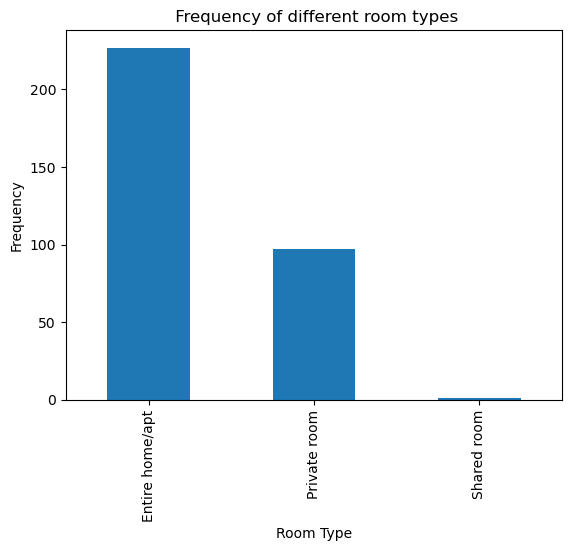

In [7]:
df.room_type.value_counts().plot(kind = "bar" ,
                                 xlabel = "Room Type",
                                 ylabel = "Frequency",
                                 title = " Frequency of different room types")

<Axes: title={'center': 'Top 10 hosts who offer a larger number of rooms for accommodation'}, xlabel='Host Name', ylabel='Frequency'>

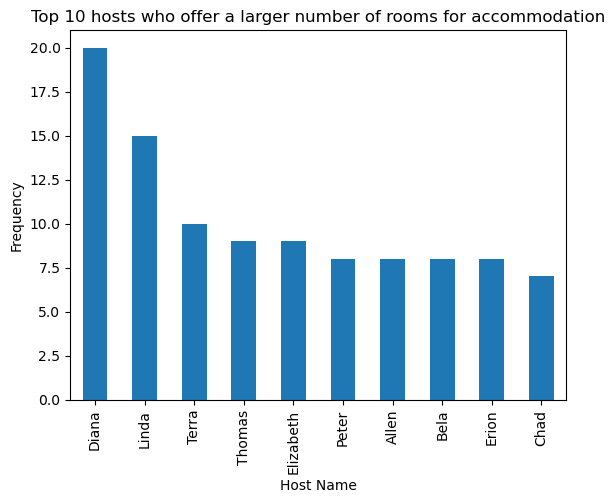

In [8]:
df.host_name.value_counts()[:10].plot(kind = "bar" ,
                                        xlabel = "Host Name",
                                        ylabel = "Frequency",
                                        title = "Top 10 hosts who offer a larger number of rooms for accommodation")

#### its seems that there is high outliers

<Axes: >

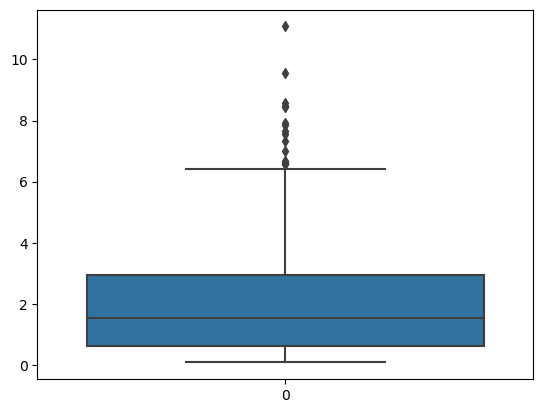

In [9]:
sns.boxplot(df.reviews_per_month)

In [10]:
# We begin form the index 3 cause we want to not include the id and host id 
selected_columns = [col for col in df.columns[3:] if df[col].dtype in ["int64","float64"]]

### Visualize Outliers 

In [11]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=3 , subplot_titles = [col.title() for col in selected_columns])

for i , column in enumerate(selected_columns):
    row = (i)//3 + 1
    col = (i)%3 + 1
    
    fig.add_trace(
    go.Box(x = df[column] ,
    showlegend=False,
    name="",
    
    opacity=0.75
),
    row=row, col=col
    
)




    fig.update_layout(plot_bgcolor = "white",
                 font = dict(color = "#909497", size = 20),
                 title = dict(text = "all numerical columns".title(), font = dict(size = 26)),
                 margin = dict(t = 100, r = 80, b = 80, l = 120),
                 hovermode="closest",
                 height = 1000,
                 width = 900)
fig.show() 

In [12]:
from tools import Muti_hist_plot
Muti_hist_plot(df[df.columns[3:]])

### The first method 
- Dropping the outliers

Source : https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8

In [13]:
def drop_Outliers(col : str):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    outliers_15_low = (df[col] < lower_lim)
    outliers_15_up = (df[col] > upper_lim)
    
    #  result len 
    # len(df[col]) - (len(df[col][outliers_15_low]) + len(df[col][outliers_15_up]))
    
    #  the Outliers
    # df[col][(outliers_15_low | outliers_15_up)]

    #  the col without the outliers 
    return df[col][~(outliers_15_low | outliers_15_up)]
        

### Drop the outliers 

In [14]:
data_without_outliers = df.copy()
for col in selected_columns:
    data_without_outliers[col] = drop_Outliers(col)

### Veiw Nan values after drop outliers

In [15]:
data_without_outliers.isna().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood                      0
latitude                           8
longitude                          0
room_type                          0
price                             17
minimum_nights                    53
number_of_reviews                 32
last_review                        0
reviews_per_month                 16
calculated_host_listings_count    18
availability_365                   0
number_of_reviews_ltm             18
dtype: int64

#### for now we will drop them 

In [16]:
data_without_outliers = data_without_outliers.dropna()

In [17]:
for col in df.columns:
    print(f"Number of unique values in column {col} is : {data_without_outliers[col].nunique()}")

Number of unique values in column id is : 197
Number of unique values in column name is : 197
Number of unique values in column host_id is : 104
Number of unique values in column host_name is : 101
Number of unique values in column neighbourhood is : 14
Number of unique values in column latitude is : 191
Number of unique values in column longitude is : 192
Number of unique values in column room_type is : 3
Number of unique values in column price is : 82
Number of unique values in column minimum_nights is : 3
Number of unique values in column number_of_reviews is : 86
Number of unique values in column last_review is : 94
Number of unique values in column reviews_per_month is : 153
Number of unique values in column calculated_host_listings_count is : 11
Number of unique values in column availability_365 is : 113
Number of unique values in column number_of_reviews_ltm is : 50


In [18]:
Muti_hist_plot(data_without_outliers[data_without_outliers.columns[3:]])

Ok after drop the outlier we can see that the Minimum Night is between 1 - 3 
and with outliers it was between 1 - 31 
its a huge diffrent 



## bivariate analysis

##### Coordinates are often expressed as two sets of numbers. The first number is always the latitude and the second is the longitude
- Latitudes are horizontal lines that measure distance north or south of the equator. 
- Longitudes are vertical lines that measure east or west of the meridian in Greenwich, England. 

In [19]:
fig = go.Figure()


fig.add_trace(go.Scatter(x = data_without_outliers.longitude, y = data_without_outliers.latitude,
                        mode = "markers",
                        ))


fig.update_layout(plot_bgcolor = "white",
                 font = dict(color = "#909497", size = 18),
                 title = dict(text = "Longitude VS Latitude", font = dict(size = 26)),
                 xaxis = dict(title = "Longitude", linecolor = "#909497"),
                 yaxis = dict(title = "Latitude", tickformat = ",", linecolor = "#909497"),
                 margin = dict(t = 100, r = 80, b = 80, l = 120),
                 height = 720,
                 width = 900)


fig.show()        

Think about it as a map when u looking to this scatter plot 
as a said appove its Coordinates 

In [20]:
from tools import column_summary_statistics
from tools import plot_column_summary_statistics

In [21]:
plot_column_summary_statistics(column_summary_statistics(data_without_outliers , "room_type" , "price"))

the Private room and Entire Home/apt has a highest price  in dataset <br>
and the shared room has the highest price within the lowest price <br>

In [22]:
plot_column_summary_statistics(column_summary_statistics(data_without_outliers , "neighbourhood" , "price"))


* The rooms in the sixth ward have the highest total price compare to the rooms in the other wards 
* The average price of rooms in the eighth ward is higher than the average price of rooms in other wards 
* The Twelfth ward has the highest price within the lowest price 


### Let create a catigorical column based on price 
* to make levels for price like
* Low price 
* Midium pirce 
* High price

In [23]:
data_without_outliers["price_cat"] = pd.cut(data_without_outliers.price , bins = [26 , 100 ,130,199],labels = ["Low" , "Mid" , "High"])

In [24]:
plot_column_summary_statistics(column_summary_statistics(data_without_outliers , "price_cat" , "price"))

In [25]:
# I have to ignore this part cause the last review column for review time 
# maybe on another dataset we will do time series analysis
# data_without_outliers.last_review = pd.to_datetime(data_without_outliers.last_review)
# data_without_outliers["year"] = data_without_outliers.last_review.dt.year
# data_without_outliers["month"] = data_without_outliers.last_review.dt.month


# MultiVari Analysis

In [26]:
# Group the data by 'neighbourhood' and 'host_name', and sum the 'price' column
grouped_data = data_without_outliers.groupby(["neighbourhood", "host_name"])["price"].sum().reset_index()

# Create the Plotly figure
fig = go.Figure(data=go.Scatter(
    x=grouped_data["neighbourhood"],
    y=grouped_data["price"],
    mode='markers',
    text=grouped_data["host_name"],
    marker=dict(
        size=12,
        color=grouped_data["price"],
        colorscale='Viridis',
        opacity=0.8
    )
))

# Customize the layout
fig.update_layout(plot_bgcolor = "white",
                 font = dict(color = "#909497", size = 18),
                 title = dict(text = "Total Price by Neighbourhood and Host Name", font = dict(size = 26)),
                 xaxis = dict(title = "Neighbourhood", linecolor = "#909497"),
                 yaxis = dict(title = "Total Price", tickformat = ",", linecolor = "#909497"),
                 margin = dict(t = 100, r = 80, b = 80, l = 120),
                 hovermode="closest",
                 height = 720,
                 width = 900)

# Display the plot
fig.show()

In [42]:
# Group the data by 'neighbourhood' and 'host_name', and sum the 'price' column
grouped_data = data_without_outliers.groupby(["neighbourhood", "host_name"])["price"].sum().reset_index()

# Create the Plotly figure
fig = go.Figure()

for host_name in grouped_data["host_name"].unique():
    host_data = grouped_data[grouped_data["host_name"] == host_name]
    fig.add_trace(go.Scatter(
        x=host_data["neighbourhood"],
        y=host_data["price"],
        mode='lines+markers',
        name=host_name,
        text =host_name
    ))

# Customize the layout
fig.update_layout(plot_bgcolor = "white",
                 font = dict(color = "#909497", size = 18),
                 title = dict(text = "Total Price by Neighbourhood and Host Name", font = dict(size = 26)),
                 xaxis = dict(title = "Neighbourhood", linecolor = "#909497"),
                 yaxis = dict(title = "Total Price", tickformat = ",", linecolor = "#909497"),
                 margin = dict(t = 100, r = 80, b = 80, l = 120),
                 height = 720,
                 width = 1000)

# Display the plot
fig.show()

* you can see how the diffrent on host price go from ward to aonther ward 

In [28]:
fig = go.Figure()


fig.add_trace(go.Scatter(x = data_without_outliers.longitude, y = data_without_outliers.latitude,

                        mode = "markers",
                        text=data_without_outliers.price,
                             marker=dict(
        size=12,
        color=data_without_outliers["price"],
        colorscale='Viridis',
        opacity=0.8
    )
                        ))


fig.update_layout(plot_bgcolor = "white",
                 font = dict(color = "#909497", size = 18),
                 title = dict(text = "Longitude VS Latitude VS Price", font = dict(size = 26)),
                 xaxis = dict(title = "Longitude", linecolor = "#909497"),
                 yaxis = dict(title = "Latitude", tickformat = ",", linecolor = "#909497"),
                 margin = dict(t = 100, r = 80, b = 80, l = 120),
                 height = 720,
                 width = 900)


fig.show()        

### Data Preprocessing 

In [29]:
# data_without_outliers.neighbourhood = data_without_outliers.neighbourhood.replace({k : i for i , k in enumerate(df.neighbourhood.unique())}) 
data = data_without_outliers.join(pd.get_dummies(data_without_outliers.neighbourhood))

In [30]:
data = data.join(pd.get_dummies(data_without_outliers.room_type).drop("Shared room" , axis = 1))

In [31]:
data = data.drop(["name" , 
                                                    "host_name" , 
                                                    "price_cat" , 
                                                    "room_type",
                                                    "last_review",
                                                    "neighbourhood"] , axis = 1)

##### take only 15 features from data that has more relation with price 

In [32]:
corr = (data[data.corr()["price"].abs().sort_values(ascending = False)[: 15].index]).corr()

##### Try to Create a mask for heatmap but idk how to do it  TODO


In [33]:
mask = np.tri(corr.values.shape[0], k=-1)

In [34]:
masked_matrix = np.ma.array(corr.values, mask=mask)

In [41]:
import pandas as pd
import plotly.graph_objects as go
from scipy.cluster.hierarchy import dendrogram, linkage


# Corr values 
Z =corr.values

annotations = go.Annotations()
for n, row in enumerate(Z):
    for m, val in enumerate(row):
        annotations.append(go.Annotation(text=str(np.round(Z[n][m] , 2)), 
                                         x=corr.columns[m], 
                                         y=corr.index[n],
                                         showarrow=False))


# Create the heatmap
Trace=go.Heatmap(
    z=Z,
    x=corr.columns,
    y=corr.index,
    showscale=False,
    colorscale='Viridis',
    
)
fig = go.Figure(data=go.Data([Trace]))


# Customize the layout
fig.update_layout(
    title='Heatmap',
    annotations=annotations,
    width=800,
    height=800,
    autosize=False,
    margin = dict(t = 100, r = 80, b = 80, l = 120)
    
    
)

# Show the plot
fig.show()

In [40]:
data = data.reset_index(drop = True)


In [37]:
data

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,NINTH WARD,SECOND WARD,SEVENTH WARD,SIXTH WARD,TENTH WARD,THIRD WARD,THIRTEENTH WARD,TWELFTH WARD,Entire home/apt,Private room
0,7563949,39656001,42.644840,-73.758510,190.0,1.0,37.0,0.40,6.0,365,...,False,True,False,False,False,False,False,False,False,True
1,8035784,42430824,42.660630,-73.781150,199.0,3.0,18.0,0.18,2.0,179,...,False,False,False,False,True,False,False,False,False,True
2,15580397,89705052,42.656510,-73.778870,56.0,2.0,40.0,0.48,4.0,112,...,True,False,False,False,False,False,False,False,False,True
3,17238066,61700428,42.676140,-73.781690,53.0,3.0,130.0,1.55,2.0,365,...,False,False,False,False,False,False,False,False,False,True
4,17552120,20738797,42.657290,-73.803210,62.0,1.0,33.0,0.40,1.0,26,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1053892116573935214,552465537,42.659886,-73.792057,150.0,1.0,1.0,1.00,1.0,356,...,True,False,False,False,False,False,False,False,True,False
193,1055481757202000214,28987572,42.650987,-73.763078,125.0,2.0,2.0,2.00,1.0,95,...,False,False,False,True,False,False,False,False,True,False
194,1057932481605319073,217818949,42.663116,-73.738103,105.0,1.0,1.0,0.83,1.0,269,...,False,False,False,False,False,False,False,False,False,False
195,1072781767409521866,426223840,42.663916,-73.777869,102.0,1.0,7.0,5.68,2.0,256,...,False,False,False,False,False,False,False,False,True,False


In [38]:
# To read it later 
# https://medium.com/analytics-vidhya/a-complete-guide-to-adam-and-rmsprop-optimizer-75f4502d83be
# https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a